In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
raw_data= pd.read_csv('Sales Data.csv',index_col=0)
raw_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [4]:
print("Shape of Datset:",raw_data.shape)

Shape of Datset: (185950, 10)


In [5]:
missing_value=["na","np","n/a","null"]
raw_data=pd.read_csv("Sales Data.csv",na_values= missing_value)

In [6]:
raw_data.isnull().sum()

Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64

In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int64  
 4   Price Each        185950 non-null  float64
 5   Order Date        185950 non-null  object 
 6   Purchase Address  185950 non-null  object 
 7   Month             185950 non-null  int64  
 8   Sales             185950 non-null  float64
 9   City              185950 non-null  object 
 10  Hour              185950 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 15.6+ MB


In [8]:
raw_data.describe()

,Unnamed: 0,Order ID,Quantity Ordered,Price Each,Month,Sales,Hour
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,8340.388475,230417.569379,1.124383,184.399735,7.059140,185.490917,14.413305
std,5450.554093,51512.737110,0.442793,332.731330,3.502996,332.919771,5.423416
min,0.000000,141234.000000,1.000000,2.990000,1.000000,2.990000,0.000000
25%,3894.000000,185831.250000,1.000000,11.950000,4.000000,11.950000,11.000000
50%,7786.000000,230367.500000,1.000000,14.950000,7.000000,14.950000,15.000000
75%,11872.000000,275035.750000,1.000000,150.000000,10.000000,150.000000,19.000000
max,25116.000000,319670.000000,9.000000,1700.000000,12.000000,3400.000000,23.000000


In [9]:
data= raw_data.drop(['Order ID','Purchase Address','Hour'],axis=1)
data.head()

,Unnamed: 0,Product,Quantity Ordered,Price Each,Order Date,Month,Sales,City
0,0,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,12,1700.00,New York City
1,1,LG Washing Machine,1,600.00,2019-12-29 07:03:00,12,600.00,New York City
2,2,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,12,11.95,New York City
3,3,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,12,149.99,San Francisco
4,4,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,12,11.95,Atlanta


In [10]:
data = pd.DataFrame(data)
data[['Order Date1', 'Order Time']] = data['Order Date'].str.split(' ', 1, expand=True)
data = data.drop('Order Date', axis=1)

In [11]:
data.head()

,Unnamed: 0,Product,Quantity Ordered,Price Each,Month,Sales,City,Order Date1,Order Time
0,0,Macbook Pro Laptop,1,1700.00,12,1700.00,New York City,2019-12-30,00:01:00
1,1,LG Washing Machine,1,600.00,12,600.00,New York City,2019-12-29,07:03:00
2,2,USB-C Charging Cable,1,11.95,12,11.95,New York City,2019-12-12,18:21:00
3,3,27in FHD Monitor,1,149.99,12,149.99,San Francisco,2019-12-22,15:13:00
4,4,USB-C Charging Cable,1,11.95,12,11.95,Atlanta,2019-12-18,12:38:00


In [12]:
data['Order Date1'] = pd.to_datetime(data['Order Date1'],infer_datetime_format=True)
data.head()

,Unnamed: 0,Product,Quantity Ordered,Price Each,Month,Sales,City,Order Date1,Order Time
0,0,Macbook Pro Laptop,1,1700.00,12,1700.00,New York City,2019-12-30,00:01:00
1,1,LG Washing Machine,1,600.00,12,600.00,New York City,2019-12-29,07:03:00
2,2,USB-C Charging Cable,1,11.95,12,11.95,New York City,2019-12-12,18:21:00
3,3,27in FHD Monitor,1,149.99,12,149.99,San Francisco,2019-12-22,15:13:00
4,4,USB-C Charging Cable,1,11.95,12,11.95,Atlanta,2019-12-18,12:38:00


# EXPLORATORY DATA ANALYSIS

#### OVERALL SALES TREND

In [13]:
data['Month_Year_Name'] = data['Order Date1'].dt.strftime('%B %Y')
custom_order = ["January 2019", "February 2019","March 2019","April 2019","May 2019","June 2019","July 2019","August 2019","September 2019","October 2019","November 2019","December 2019", "January 2020"]
data['Month_Year_Name'] = pd.Categorical(data['Month_Year_Name'], categories=custom_order, ordered=True)
data = data.sort_values('Month_Year_Name')
data.head()

,Unnamed: 0,Product,Quantity Ordered,Price Each,Month,Sales,City,Order Date1,Order Time,Month_Year_Name
139988,3210,AAA Batteries (4-pack),2,2.99,1,5.98,Seattle,2019-01-01,11:09:00,January 2019
143244,6478,Macbook Pro Laptop,1,1700.00,1,1700.00,San Francisco,2019-01-21,12:22:00,January 2019
143245,6479,Apple Airpods Headphones,1,150.00,1,150.00,San Francisco,2019-01-03,21:20:00,January 2019
143246,6480,27in 4K Gaming Monitor,1,389.99,1,389.99,San Francisco,2019-01-21,14:25:00,January 2019
143247,6481,Google Phone,1,600.00,1,600.00,Portland,2019-01-20,16:08:00,January 2019


In [14]:
#Grouping month year
data_trend=data.groupby('Month_Year_Name').sum()['Sales'].reset_index()

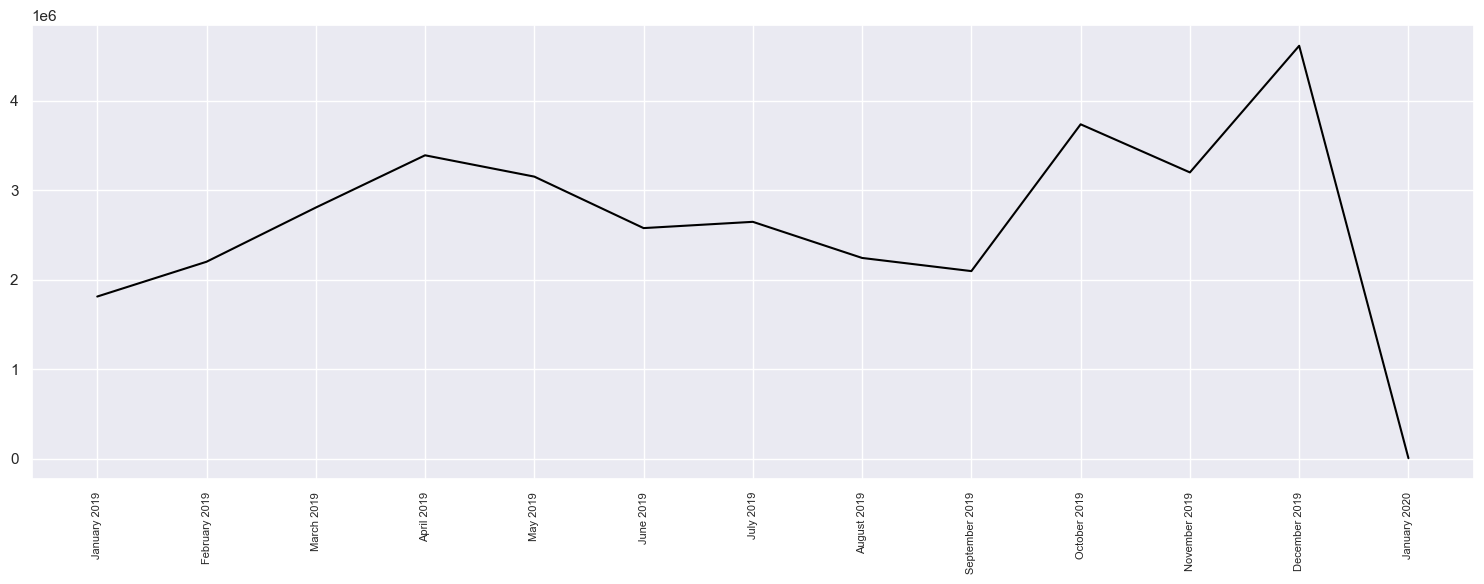

In [15]:
plt.figure(figsize=(15,6))
plt.plot(data_trend['Month_Year_Name'],data_trend['Sales'],color='black')
plt.xticks(rotation='vertical',size=8)
plt.tight_layout()
plt.show()

### Most Selling Product: By Sales

In [16]:
#GROUPING PRODUCT NAME Column
prod_sales = pd.DataFrame(data.groupby('Product').sum()['Sales'])

In [17]:
#SORTING prod_sales column
prod_sales = prod_sales.sort_values('Sales',ascending=False)

In [18]:
#TOP 10 PRODUCTS BY SALES
prod_sales[:10]

,Sales
Product,
Macbook Pro Laptop,8037600.00
iPhone,4794300.00
ThinkPad Laptop,4129958.70
Google Phone,3319200.00
27in 4K Gaming Monitor,2435097.56
34in Ultrawide Monitor,2355558.01
Apple Airpods Headphones,2349150.00
Flatscreen TV,1445700.00
Bose SoundSport Headphones,1345565.43


### Most Selling Product: By Quantity

In [19]:
#GROUPING PRODUCT NAME
most_sell_prod = pd.DataFrame(data.groupby('Product').sum()['Quantity Ordered'].reset_index())

In [20]:
#sorting most selling product
most_sell_prod  = most_sell_prod.sort_values('Quantity Ordered',ascending=False)
most_sell_prod

,Product,Quantity Ordered
5,AAA Batteries (4-pack),31017
4,AA Batteries (4-pack),27635
15,USB-C Charging Cable,23975
12,Lightning Charging Cable,23217
17,Wired Headphones,20557
6,Apple Airpods Headphones,15661
7,Bose SoundSport Headphones,13457
2,27in FHD Monitor,7550
18,iPhone,6849
1,27in 4K Gaming Monitor,6244


In [21]:
#Top 10 most selling products by quantity
most_sell_prod[:10]

,Product,Quantity Ordered
5,AAA Batteries (4-pack),31017
4,AA Batteries (4-pack),27635
15,USB-C Charging Cable,23975
12,Lightning Charging Cable,23217
17,Wired Headphones,20557
6,Apple Airpods Headphones,15661
7,Bose SoundSport Headphones,13457
2,27in FHD Monitor,7550
18,iPhone,6849
1,27in 4K Gaming Monitor,6244


### Least Selling Product: By Sales

In [30]:
#GROUPING PRODUCT NAME Column
least_prod_sales = pd.DataFrame(data.groupby('Product').sum()['Sales'])

In [34]:
#SORTING least_prod_sales column
least_prod_sales= least_prod_sales.sort_values('Sales',ascending =True)

In [35]:
#Least 10 PRODUCTS BY SALES
least_prod_sales[:10]

,Sales
Product,
AAA Batteries (4-pack),92740.83
AA Batteries (4-pack),106118.40
Wired Headphones,246478.43
USB-C Charging Cable,286501.25
Lightning Charging Cable,347094.15
LG Dryer,387600.00
LG Washing Machine,399600.00
20in Monitor,454148.71
Vareebadd Phone,827200.00


### Lest Selling Product: By Quantity

In [36]:
#GROUPING PRODUCT NAME
least_sell_prod= pd.DataFrame(data.groupby('Product').sum()['Quantity Ordered'].reset_index())

In [37]:
#sorting least selling product
least_sell_prod  = most_sell_prod.sort_values('Quantity Ordered',ascending=True)
least_sell_prod

,Product,Quantity Ordered
10,LG Dryer,646
11,LG Washing Machine,666
16,Vareebadd Phone,2068
0,20in Monitor,4129
14,ThinkPad Laptop,4130
13,Macbook Pro Laptop,4728
8,Flatscreen TV,4819
9,Google Phone,5532
3,34in Ultrawide Monitor,6199
1,27in 4K Gaming Monitor,6244


In [38]:
#Least 10 PRODUCTS BY Quantity
least_sell_prod[:10]

,Product,Quantity Ordered
10,LG Dryer,646
11,LG Washing Machine,666
16,Vareebadd Phone,2068
0,20in Monitor,4129
14,ThinkPad Laptop,4130
13,Macbook Pro Laptop,4728
8,Flatscreen TV,4819
9,Google Phone,5532
3,34in Ultrawide Monitor,6199
1,27in 4K Gaming Monitor,6244


### City With Highest Sales & Quantity Ordered

In [23]:
# Group by City and calculate sum of Quantity Ordered and Sales
city_totals = data.groupby('City').agg({
    'Quantity Ordered': 'sum',
    'Sales': 'sum'
}).reset_index()

# Find the city with the largest Quantity Ordered
largest_quantity_city = city_totals.loc[city_totals['Quantity Ordered'].idxmax()]

# Find the city with the highest Sales
highest_sales_city = city_totals.loc[city_totals['Sales'].idxmax()]

print("City with largest Quantity Ordered:")
print(largest_quantity_city[['City', 'Quantity Ordered']])

print("\nCity with highest Sales:")
print(highest_sales_city[['City', 'Sales']])

City with largest Quantity Ordered:
City                 San Francisco
Quantity Ordered             50239
Name: 7, dtype: object

City with highest Sales:
City      San Francisco
Sales        8262203.91
Name: 7, dtype: object


In [24]:
# Group by City and Product, and calculate sum of Quantity Ordered and Sales
city_product_totals = data.groupby(['City', 'Product']).agg({
    'Quantity Ordered': 'sum',
    'Sales': 'sum'
}).reset_index()

# Find the product with the highest Quantity Ordered in each city
max_qty_ordered_per_city = city_product_totals.loc[city_product_totals.groupby('City')['Quantity Ordered'].idxmax()]

# Find the product with the highest Sales in each city
max_sales_per_city = city_product_totals.loc[city_product_totals.groupby('City')['Sales'].idxmax()]

In [25]:
# Display the result
result = pd.merge(max_qty_ordered_per_city, max_sales_per_city, on=['City'], suffixes=('_MaxQtyOrdered', '_MaxSales'))

# Check the columns of the result DataFrame
print(result.columns)

# Assign new column names
result.columns = ['City', 'Product_MaxQtyOrdered', 'Quantity_Ordered_MaxQtyOrdered', 'Sales_MaxQtyOrdered', 
                  'Product_MaxSales', 'Quantity_Ordered_MaxSales', 'Sales_MaxSales']

# Print the result
print(result)


Index(['City', 'Product_MaxQtyOrdered', 'Quantity Ordered_MaxQtyOrdered',
       'Sales_MaxQtyOrdered', 'Product_MaxSales', 'Quantity Ordered_MaxSales',
       'Sales_MaxSales'],
      dtype='object')
             City   Product_MaxQtyOrdered  Quantity_Ordered_MaxQtyOrdered  \
0         Atlanta  AAA Batteries (4-pack)                            2359   
1          Austin  AAA Batteries (4-pack)                            1668   
2          Boston  AAA Batteries (4-pack)                            3461   
3          Dallas  AAA Batteries (4-pack)                            2504   
4     Los Angeles  AAA Batteries (4-pack)                            4967   
5   New York City  AAA Batteries (4-pack)                            4124   
6        Portland  AAA Batteries (4-pack)                            2080   
7   San Francisco  AAA Batteries (4-pack)                            7408   
8         Seattle  AAA Batteries (4-pack)                            2446   

   Sales_MaxQtyOrdered    Pr

# Hypothesis investigation: Price Vs Quantity Ordered

Now that we have explored the data, it's time to investigate whether price sensitivity has some influence on sales. First we need to define exactly what is price sensitivity.

    > Since we have the sales data for each of the products for the year of 2019 & January of 2020, we will create new features to measure "price sensitivity" using the average of the year, the last 6 months and the last 3 months


In [26]:
# Create mean average data
mean_year = data.groupby(['Product']).mean().reset_index()
mean_6m = data[data['Order Date1'] > '2019-01-01'].groupby(['Product']).mean().reset_index()
mean_3m = data[data['Order Date1'] > '2019-01-01'].groupby(['Product']).mean().reset_index()

# Rename columns for better clarity
mean_year = mean_year.rename(index=str, columns={
    "Price Each": "mean_year_price_each",
    "Quantity Ordered": "mean_year_qty_ordered",
    "Sales": "mean_year_sales"
})
mean_6m = mean_6m.rename(index=str, columns={
    "Price Each": "mean_6m_price_each",
    "Quantity Ordered": "mean_6m_qty_ordered",
    "Sales": "mean_6m_sales"
})
mean_3m = mean_3m.rename(index=str, columns={
    "Price Each": "mean_3m_price_each",
    "Quantity Ordered": "mean_3m_qty_ordered",
    "Sales": "mean_3m_sales"
})

# Merge into a single dataframe
features = pd.merge(mean_year, mean_6m, on='Product')
features = pd.merge(features, mean_3m, on='Product')

# Display the resulting DataFrame
print(features)

                       Product  Unnamed: 0_x  mean_year_qty_ordered  \
0                 20in Monitor   8354.962204               1.006828   
1       27in 4K Gaming Monitor   8432.019583               1.002247   
2             27in FHD Monitor   8365.652191               1.005728   
3       34in Ultrawide Monitor   8302.651351               1.002912   
4        AA Batteries (4-pack)   8309.510133               1.343004   
5       AAA Batteries (4-pack)   8300.951456               1.502689   
6     Apple Airpods Headphones   8352.914786               1.007203   
7   Bose SoundSport Headphones   8395.898311               1.009906   
8                Flatscreen TV   8309.108125               1.003958   
9                 Google Phone   8185.231493               1.001267   
10                    LG Dryer   8525.984520               1.000000   
11          LG Washing Machine   7934.246246               1.000000   
12    Lightning Charging Cable   8405.745452               1.071983   
13    

In [27]:
features.head()

,Product,Unnamed: 0_x,mean_year_qty_ordered,mean_year_price_each,Month_x,mean_year_sales,Unnamed: 0_y,mean_6m_qty_ordered,mean_6m_price_each,Month_y,mean_6m_sales,Unnamed: 0,mean_3m_qty_ordered,mean_3m_price_each,Month,mean_3m_sales
0,20in Monitor,8354.962204,1.006828,109.99,7.153377,110.740968,8359.603612,1.006834,109.99,7.159385,110.741701,8359.603612,1.006834,109.99,7.159385,110.741701
1,27in 4K Gaming Monitor,8432.019583,1.002247,389.99,7.133226,390.866382,8437.595693,1.002250,389.99,7.140125,390.867368,8437.595693,1.002250,389.99,7.140125,390.867368
2,27in FHD Monitor,8365.652191,1.005728,149.99,7.001199,150.849141,8371.683958,1.005734,149.99,7.007601,150.850057,8371.683958,1.005734,149.99,7.007601,150.850057
3,34in Ultrawide Monitor,8302.651351,1.002912,379.99,7.005986,381.096588,8311.127535,1.002921,379.99,7.023528,381.099820,8311.127535,1.002921,379.99,7.023528,381.099820
4,AA Batteries (4-pack),8309.510133,1.343004,3.84,7.073820,5.157137,8313.080381,1.343032,3.84,7.081209,5.157244,8313.080381,1.343032,3.84,7.081209,5.157244


In [28]:
# Calculate correlation coefficients for each time period
correlation_year_price = features['mean_year_price_each'].corr(features['mean_year_qty_ordered'])
correlation_6m_price = features['mean_6m_price_each'].corr(features['mean_6m_qty_ordered'])
correlation_3m_price = features['mean_3m_price_each'].corr(features['mean_3m_qty_ordered'])

# Display the correlation coefficients
print(f"Correlation with mean_year_price_each: {correlation_year_price}")
print(f"Correlation with mean_6m_price_each: {correlation_6m_price}")
print(f"Correlation with mean_3m_price_each: {correlation_3m_price}")


Correlation with mean_year_price_each: -0.40332296943940865
Correlation with mean_6m_price_each: -0.40325856752944966
Correlation with mean_3m_price_each: -0.40325856752944966


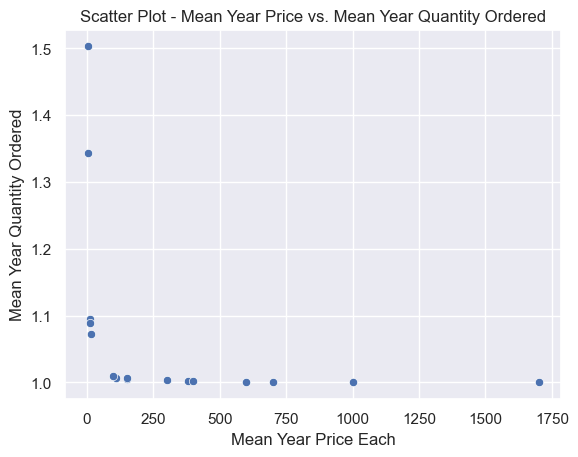

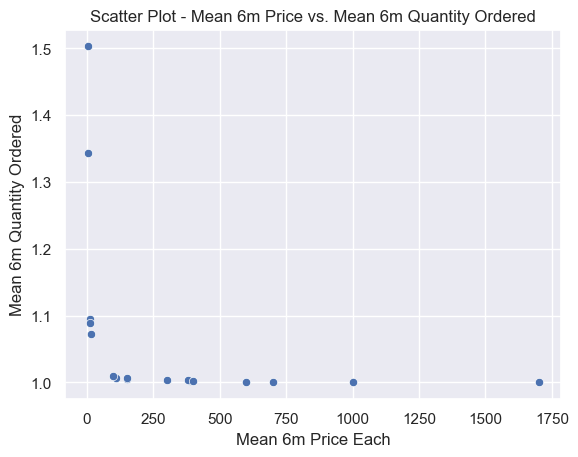

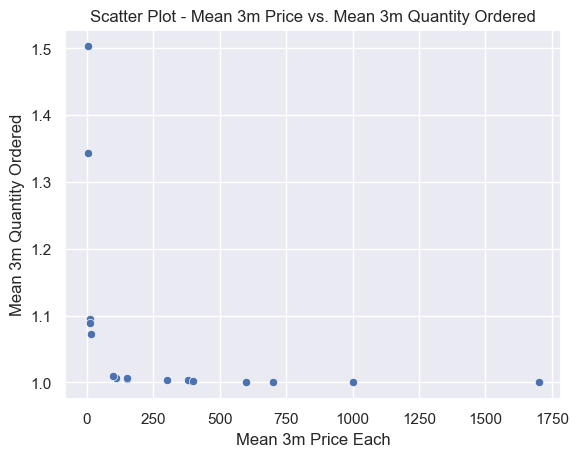

In [29]:
# Scatter plot for mean_year
sns.scatterplot(x=features['mean_year_price_each'], y=features['mean_year_qty_ordered'])
plt.title('Scatter Plot - Mean Year Price vs. Mean Year Quantity Ordered')
plt.xlabel('Mean Year Price Each')
plt.ylabel('Mean Year Quantity Ordered')
plt.show()

# Scatter plot for mean_6m
sns.scatterplot(x=features['mean_6m_price_each'], y=features['mean_6m_qty_ordered'])
plt.title('Scatter Plot - Mean 6m Price vs. Mean 6m Quantity Ordered')
plt.xlabel('Mean 6m Price Each')
plt.ylabel('Mean 6m Quantity Ordered')
plt.show()

# Scatter plot for mean_3m
sns.scatterplot(x=features['mean_3m_price_each'], y=features['mean_3m_qty_ordered'])
plt.title('Scatter Plot - Mean 3m Price vs. Mean 3m Quantity Ordered')
plt.xlabel('Mean 3m Price Each')
plt.ylabel('Mean 3m Quantity Ordered')
plt.show()

Based on the scatter plots and negative correlation coefficients observed, it appears that there is a negative relationship between mean product price and mean quantity ordered for the given time periods. Specifically:

- As the mean price increases, the mean quantity ordered tends to decrease.

This suggests that there is a certain degree of price sensitivity in the data, where customers may be less inclined to order larger quantities when prices are higher. However, it's important to note that correlation does not imply causation, and other factors may also contribute to the observed relationship.

In conclusion, the visual analysis and correlation coefficients support the idea that price sensitivity influences the quantity ordered, with a tendency for lower quantities to be ordered when prices are higher on average.